# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
%matplotlib inline

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import os
import csv

In [ ]:
# Import API key
from api_keys import weather_api_key
weather_api_key

In [ ]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [ ]:
# Output File (CSV)
output_data_file = os.path.join(os.getcwd(), "..",'output_data/cities.csv')
output_data_file

In [ ]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [ ]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [ ]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [ ]:
# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Get Weather Data
url = 'http://api.openweathermap.org/data/2.5/weather?' 
url
units = "imperial"
query_url = f'{url}appid={weather_api_key}&units={units}&q='
query_url

In [ ]:
# Get weather data
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
weather_json

In [ ]:
print(cities)

In [ ]:
#Perform a weather check on each city using a series of successive API calls.

In [ ]:
# Set up lists to hold response info
city_name = []
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found.") 
    continue

In [ ]:
# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# create a data frame
weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

In [ ]:
# Save into a .csv
weather_data.to_csv(r'weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# Build a Latitude vs. Temperature scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")


# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temperature.png")

# Show plot
plt.show()

In [ ]:
# Analysis: The scatter plot is showing that the temperature is greater near the equator than when you go far north or far south of it. The tempertures are, on average, greatest around 20 degrees North of the equator. 

## Latitude vs. Humidity Plot

In [ ]:
# Build a Latitude vs. Temperature scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

In [ ]:
# There seems to be no correlation between latitude and humidity, as the scatter plot shows data all over the map. There is a region of high density of greater humidities at 60 degrees North of the Equator, and another smaller region at the Equator.

## Latitude vs. Cloudiness Plot

In [ ]:
# Build a Latitude vs. Cloudiness scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

In [ ]:
# This scatter plot is very unique. The plot shows that cloudiness is most commonly either 0 or 100 regardless of the latitude, with the exception of the Equator, near which the cloudiness is not zero. Otherwise, there is not an obvious correlation between cloudiness and latitude.  

## Latitude vs. Wind Speed Plot

In [ ]:
# Build a Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()

In [ ]:
# This plot shows that wind speed is most commonly between 0 and 15 mph regardless of latitude. There seems to be no correlation between wind speed and latitude. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
northern_weather_df = weather_data.loc[weather_data["Latitude"]>=0]
northern_weather_df

In [31]:
southern_weather_df = weather_data.loc[weather_data["Latitude"]<0]
southern_weather_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Vao,NC,-22.6667,167.4833,69.31,66,61,19.17
1,Kruisfontein,ZA,-34.0033,24.7314,51.89,89,56,1.74
2,Neiafu,TO,-18.6500,-173.9833,77.68,78,40,4.61
3,Hithadhoo,MV,-0.6000,73.0833,81.86,69,98,6.40
5,Hobart,AU,-42.8794,147.3294,45.10,92,0,5.01
...,...,...,...,...,...,...,...,...
549,Oranjemund,NA,-28.5500,16.4333,56.66,97,15,2.80
553,Loa Janan,ID,-0.5830,117.0950,73.83,91,26,0.34
554,Paraíba do Sul,BR,-22.1619,-43.2928,61.34,96,39,3.89
567,Manokwari,ID,-0.8667,134.0833,80.80,74,95,4.81


In [28]:
# Calculate the correlation coefficient and linear regression model 
# for max temp and latitude
correlation = st.pearsonr(northern_weather_df["Temperature"],northern_weather_df["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.66


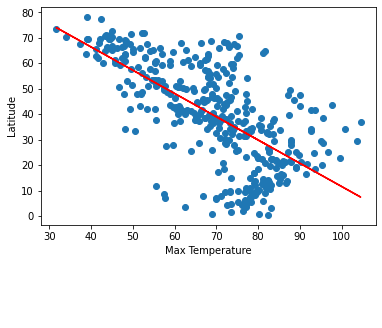

In [29]:
x_values = northern_weather_df["Temperature"]
y_values = northern_weather_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
correlation = st.pearsonr(southern_weather_df["Temperature"],southern_weather_df["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.77


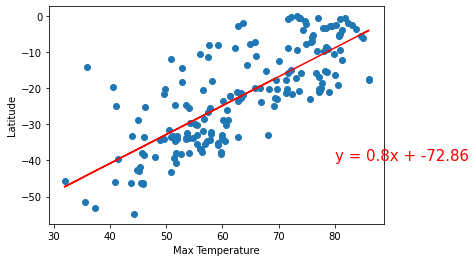

In [33]:
x_values = southern_weather_df["Temperature"]
y_values = southern_weather_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [34]:
correlation = st.pearsonr(northern_weather_df["Humidity"],northern_weather_df["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.04


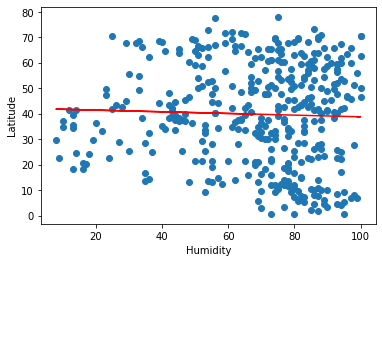

In [35]:
x_values = northern_weather_df["Humidity"]
y_values = northern_weather_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [36]:
correlation = st.pearsonr(southern_weather_df["Humidity"],southern_weather_df["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.04


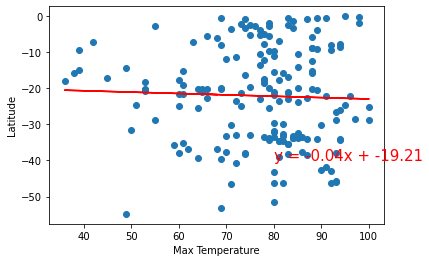

In [37]:
x_values = southern_weather_df["Humidity"]
y_values = southern_weather_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [38]:
correlation = st.pearsonr(northern_weather_df["Cloudiness"],northern_weather_df["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.14


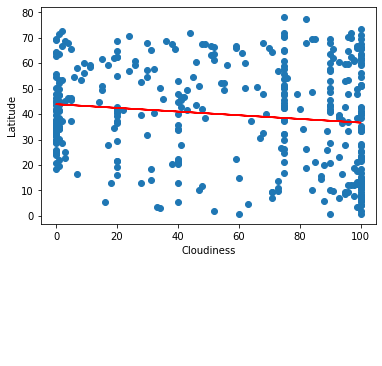

In [39]:
x_values = northern_weather_df["Cloudiness"]
y_values = northern_weather_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,-55),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [40]:
correlation = st.pearsonr(southern_weather_df["Cloudiness"],southern_weather_df["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.16


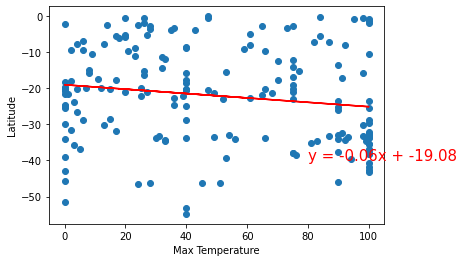

In [41]:
x_values = southern_weather_df["Cloudiness"]
y_values = southern_weather_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [42]:
correlation = st.pearsonr(northern_weather_df["Wind Speed"],northern_weather_df["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.05


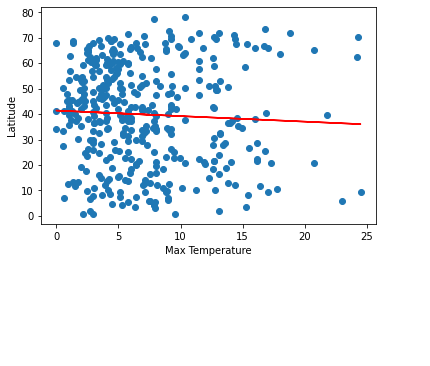

In [43]:
x_values = northern_weather_df["Wind Speed"]
y_values = northern_weather_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,-55),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [44]:
correlation = st.pearsonr(southern_weather_df["Humidity"],southern_weather_df["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.04


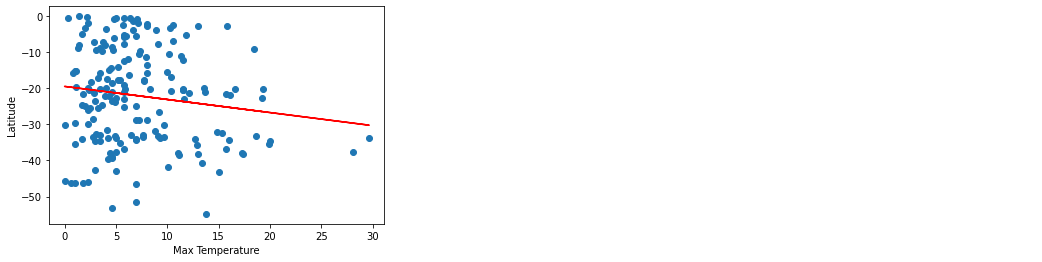

In [45]:
x_values = southern_weather_df["Wind Speed"]
y_values = southern_weather_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# According to the plots and correlation calculations, there are no appreciable correlations between any of the conditions and the distance from the equator in either hemisphere except for the correlation between temperature and distance from the equator. As expected, the temperature increases as the distance away from the equator decreases in both hemispheres; in other words, it is hotter near the equator and colder as you get farther away from the equator in either direction. 